In [1]:
# 加载画图包
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'


In [2]:
import pandas as pd
import numpy as np

In [3]:
# 读取代表性转录本gene_model
araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed'
araport11_isoform = pd.read_csv(araport11_isoform_path, sep='\t', 
                                names=['chrom', 'chromStart', 'chromEnd', 'name', 
                                       'score', 'strand', 'thickStart', 'thickEnd', 
                                       'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
                               )
araport11_isoform['gene_id'] = araport11_isoform['name'].map(lambda x: x.split('.')[0])
araport11_isoform.set_index('gene_id', inplace=True)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'

In [4]:
import sys
sys.path.append('/public/home/mowp/workspace/mowp_scripts/tools/pyIGV')

In [5]:
%load_ext autoreload
%autoreload 1
%aimport coverage_plot

# Example

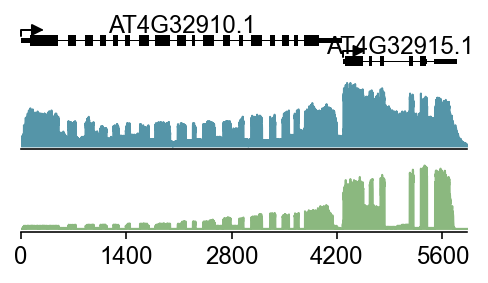

In [6]:
gene_id = 'AT4G36195'
chrom = '4'
start = 15881245
end = 15887180
strand = '+'
igv = coverage_plot.COV(chrom, start, end, strand=strand)

igv.add_gene_model(araport11_isoform_path)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv.add_bam(infile, color='#5595A8')

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/cbRNA.polyadenylated.bam'
igv.add_bam(infile, color='#8BB87F')

ax = igv.plot(height=2, width=4, gene_track_height=3)

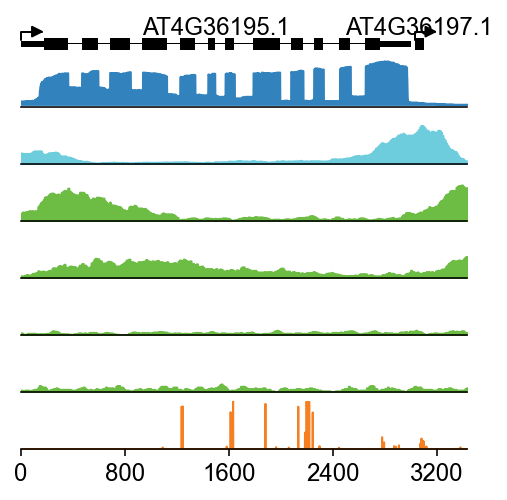

In [33]:
gene_id = 'AT4G36195'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
end = 17130459
igv = coverage_plot.COV(chrom, start, end, strand=strand)

igv.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT4G36195.1', 'AT4G36197.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv.add_bam(infile, color='#3182BD', gene_list={gene_id})

infile = '/public/home/lab-zhai/edit_share/jbrowse/tair10/Suz_chromatin_state/ATAC-SRX2000799.bw'
igv.add_bw(infile, color='#6ECDDC', chrom_prefix='chr', data_range=[0, 14])

infile = '/public/home/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K4me3_ChIPseq_GSM4275144.sorted.rmdup.CPM.bw'
igv.add_bw(infile, color='#6DBD44', data_range=[0, 6])

infile = '/public/home/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K36me3_ChIPseq_GSM4275147.sorted.rmdup.CPM.bw'
igv.add_bw(infile, color='#6DBD44', data_range=[0, 6])

infile = '/public/home/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K27me3_ChIPseq_GSM4275146.sorted.rmdup.CPM.bw'
igv.add_bw(infile, color='#6DBD44', data_range=[0, 6])

infile = '/public/home/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K9me2_ChIPseq_GSM4275145.sorted.rmdup.CPM.bw'
igv.add_bw(infile, color='#6DBD44', data_range=[0, 6])

infile = '/public/home/mowp/test/BS_Seq/bw_files/WT_BS_GSM1242401.methratio.cg.bw'
igv.add_bw(infile, color='#F57F21', data_range=[0, 1])

ax = igv.plot(height=4, width=4, gene_track_height=3)